In [278]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import os

In [279]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week5


In [280]:
# Import Names of counties from file
#maize_data_dir = cwd + '/Data/Maize/'
#IL_county_data = maize_data_dir + 'County_Names_IL.csv'

IL_county_data = 'County_Name_IL_updated.csv'
county_data = pd.read_csv(IL_county_data)

# rename Ag district to Ag_District
county_data.rename(columns={'Ag District': 'Ag_District'}, inplace=True)

# making all column names UPPER CASE --> inline with the weather data file
county_data.columns = map(str.upper, county_data.columns)

# making COUNTY, STATE, AG DISTRICT, COMMODITY data lower case
# CAN BE MADE FASTER WITH A LAMBDA FUNCTION
county_data.STATE = county_data.STATE.str.lower()
county_data.AG_DISTRICT = county_data.AG_DISTRICT.str.lower()
county_data.COUNTY = county_data.COUNTY.str.lower() 
county_data.COMMODITY = county_data.COMMODITY.str.lower()

print(county_data.head())

# Print name of unique districts
ag_district_list = list(county_data['AG_DISTRICT'].unique())
print(" \n Agricultural Districts: \n")
print(ag_district_list)

      STATE AG_DISTRICT      COUNTY COMMODITY     VALUE
0  illinois     central      mclean      corn  63008000
1  illinois     central       logan      corn  41005000
2  illinois     central       macon      corn  30430000
3  illinois        east    iroquois      corn  62773000
4  illinois        east  livingston      corn  54632000
 
 Agricultural Districts: 

['central', 'east', 'east southeast', 'northeast', 'northwest', 'southeast', 'southwest', 'west', 'west southwest']


In [281]:
# Group counties belonging to a particular agricultural district and store them in a dictionary

district_county_dict = {}

for district in ag_district_list:
    county_in_ag_district = county_data[(county_data['AG_DISTRICT'] == district)] 
    county_in_ag_district = county_in_ag_district['COUNTY']
    district_county_dict[district] = county_in_ag_district

# Print the dictionary, Structure {Region_1: County_1, County_2 ,... ; Region_2: County_1, County_2.. }
for key,values in district_county_dict.items():
    print(key)
    print(values)
    print("\n")

central
0    mclean
1     logan
2     macon
Name: COUNTY, dtype: object


east
3      iroquois
4    livingston
5     champaign
Name: COUNTY, dtype: object


east southeast
6     shelby
7      edgar
8    douglas
Name: COUNTY, dtype: object


northeast
9     la salle
10     de kalb
11      grundy
Name: COUNTY, dtype: object


northwest
12    bureau
13      ogle
14       lee
Name: COUNTY, dtype: object


southeast
15       white
16       wayne
17    gallatin
Name: COUNTY, dtype: object


southwest
18    washington
19      st clair
20       clinton
Name: COUNTY, dtype: object


west
21       knox
22    hancock
23     warren
Name: COUNTY, dtype: object


west southwest
24     sangamon
25    christian
26     macoupin
Name: COUNTY, dtype: object




In [282]:
# Import weather data file
#weather_data_dir = cwd + '/Data/Weather/'
#sample_weather_file = weather_data_dir + 'weather_data.csv'
sample_weather_file = 'weather_data.csv'
sample_weather_data = pd.read_csv(sample_weather_file)

print("\n Column Information \n")
print(sample_weather_data.columns.all)


 Column Information 

<bound method Index._add_logical_methods.<locals>._make_logical_function.<locals>.logical_func of Index(['Unnamed: 0', 'COUNTY', 'YEAR', 'MONTH', 'TMP_HIGH', 'TMP_AVG',
       'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG',
       'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH',
       'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN',
       'NUM_DAYS_SNOW', 'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM'],
      dtype='object')>


In [283]:
# Append corresponding AGRICULTURAL DISTRICT to COUNTY
sample_weather_data['AG_DISTRICT'] = "Dummy"
sample_weather_data.drop('Unnamed: 0', axis=1, inplace=True)

# reorder the AG_DISTRICT to become the first column
colnames = sample_weather_data.columns.tolist()
colnames = colnames[-1:] + colnames[:-1]
sample_weather_data = sample_weather_data[colnames]

county_names_list = list(county_data['COUNTY'].unique())

for county in county_names_list:
    county_district = county_data[(county_data['COUNTY'] == county)] 
    county_district = county_district['AG_DISTRICT']
    
    selected_county = sample_weather_data[(sample_weather_data['COUNTY'] == county)]
    
    sample_weather_data.loc[sample_weather_data['COUNTY'] == county, 'AG_DISTRICT'] = county_district.values

sample_weather_data = sample_weather_data[sample_weather_data.AG_DISTRICT != 'Dummy']
sample_weather_data.loc[:,['AG_DISTRICT','COUNTY']].head()
sample_weather_data.head()
#print(sample_weather_data.columns.all)

#sample_weather_data.iloc[:,5:26]


,AG_DISTRICT,COUNTY,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,...,VIS_HIGH,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM
0,central,mclean,2001,JAN,41.0,24.935484,3.0,37.0,22.032258,1.0,...,20.0,7.774194,0.0,21.0,9.322581,0.0,5.0,10.0,4.0,0.0
1,central,mclean,2001,FEB,57.0,28.964286,-2.0,55.0,22.892857,-9.0,...,20.0,9.464286,0.0,24.0,10.035714,0.0,7.0,7.0,2.0,3.0
2,central,mclean,2001,MAR,59.0,36.225806,15.0,50.0,26.193548,5.0,...,20.0,11.000000,1.0,20.0,9.322581,0.0,6.0,5.0,1.0,0.0
3,central,mclean,2001,ARP,84.0,57.533333,28.0,68.0,42.566667,18.0,...,20.0,12.033333,1.0,23.0,10.466667,0.0,8.0,1.0,0.0,3.0
4,central,mclean,2001,MAY,89.0,63.935484,44.0,68.0,51.709677,23.0,...,20.0,10.580645,0.0,25.0,8.129032,0.0,11.0,0.0,2.0,2.0


In [284]:
groupby_ag_district = sample_weather_data.groupby(['YEAR', 'MONTH','AG_DISTRICT'])
sample_data = groupby_ag_district['NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_THNDRSTRM','NUM_DAYS_SNOW','NUM_DAYS_FOG','PRECIP'].sum()

# Writes to Excel
# writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
# sample_data.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
# writer.save()

#sample_data.iloc[:9]
#sample_data['AG_DISTRICT' == 'Dummy']
sample_data.iloc[:,:]

NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM  \
YEAR MONTH AG_DISTRICT                                                      
2001 ARP   central                14.0           10.0                 3.0   
           east                   21.0            0.0                 9.0   
           east southeast         10.0            0.0                 6.0   
           northeast              26.0            0.0                18.0   
           northwest               0.0            0.0                 7.0   
           southeast               2.0            0.0                 7.0   
           southwest              16.0            0.0                24.0   
           west                    0.0            0.0                 0.0   
           west southwest         20.0            2.0                10.0   
     AUG   central                 8.0            0.0                 4.0   
           east                   13.0            0.0                 6.0   
           east southeast         13.0            0.0                 6.0   
           northwest               0.0            0.0                 5.0   
           southwest               8.0            0.0                 7.0   
           west                    0.0            0.0                 0.0   
           west southwest         13.0            0.0                 7.0   
     DEC   central                 6.0            9.0                 0.0   
           east                    8.0           10.0                 0.0   
           east southeast          8.0           10.0                 0.0   
           northwest               0.0            0.0                 1.0   
           southwest              11.0            4.0                 0.0   
           west                    0.0            0.0                 0.0   
           west southwest          7.0            8.0                 1.0   
     FEB   central                 7.0            8.0                 4.0   
           east                    9.0           10.0                 4.0   
           east southeast          9.0           10.0                 4.0   
           northeast               1.0            0.0                 0.0   
           northwest               6.0            9.0                 2.0   
           southeast               0.0            0.0                 0.0   
           southwest              11.0            7.0                 3.0   
...                                ...            ...                 ...   
2016 MAY   southwest              57.0            0.0                32.0   
           west                   39.0            0.0                20.0   
           west southwest         45.0            0.0                24.0   
     NOV   central                15.0            0.0                 6.0   
           east                   26.0            1.0                 4.0   
           east southeast         24.0            0.0                 6.0   
           northeast              23.0            2.0                 5.0   
           northwest              24.0            3.0                 6.0   
           southeast              15.0            0.0                 2.0   
           southwest              24.0            0.0                 7.0   
           west                   19.0            0.0                 4.0   
           west southwest         24.0            2.0                11.0   
     OCT   central                18.0            0.0                 9.0   
           east                   29.0            0.0                14.0   
           east southeast         22.0            0.0                13.0   
           northeast              32.0            0.0                20.0   
           northwest              36.0            0.0                17.0   
           southeast              11.0            0.0                 6.0   
           southwest              18.0            0.0                12.0   
           west        

AG_DISTRICT     YEAR
central         2001     2.77
east            2001    36.61
east southeast  2001    44.68
northeast       2001    19.34
northwest       2001    22.36
Name: PRECIP, dtype: float64




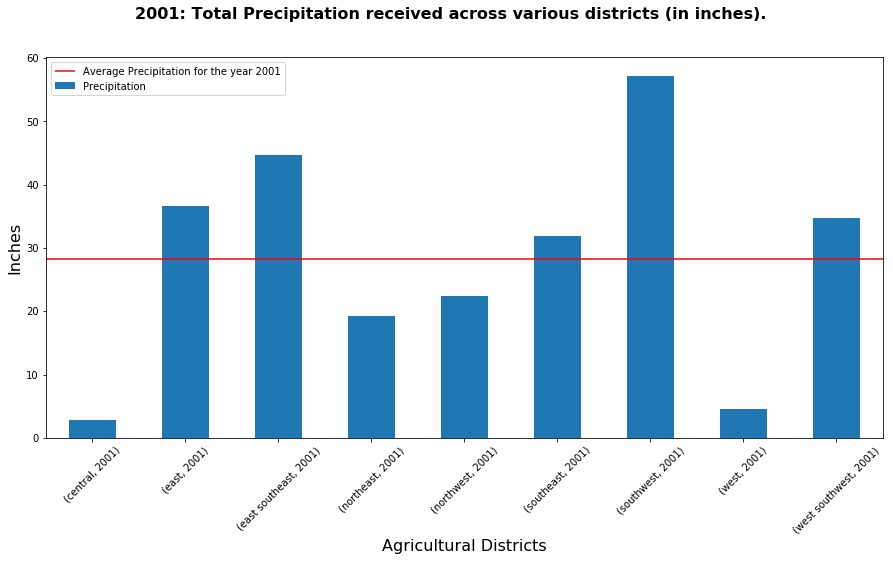

AG_DISTRICT     YEAR
central         2002    31.29
east            2002    59.82
east southeast  2002    82.81
northeast       2002    50.21
northwest       2002    50.21
Name: PRECIP, dtype: float64




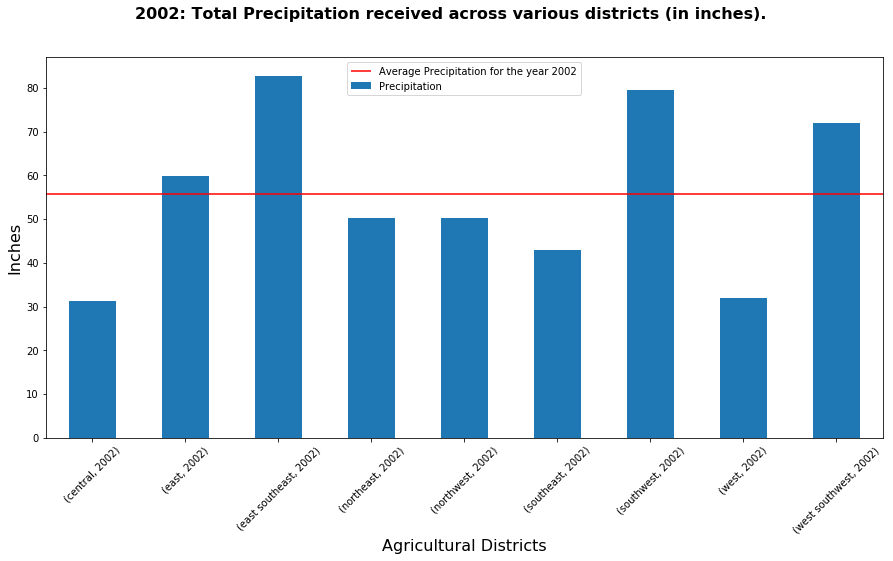

AG_DISTRICT     YEAR
central         2003    20.63
east            2003    51.01
east southeast  2003    70.53
northeast       2003    45.46
northwest       2003    74.41
Name: PRECIP, dtype: float64




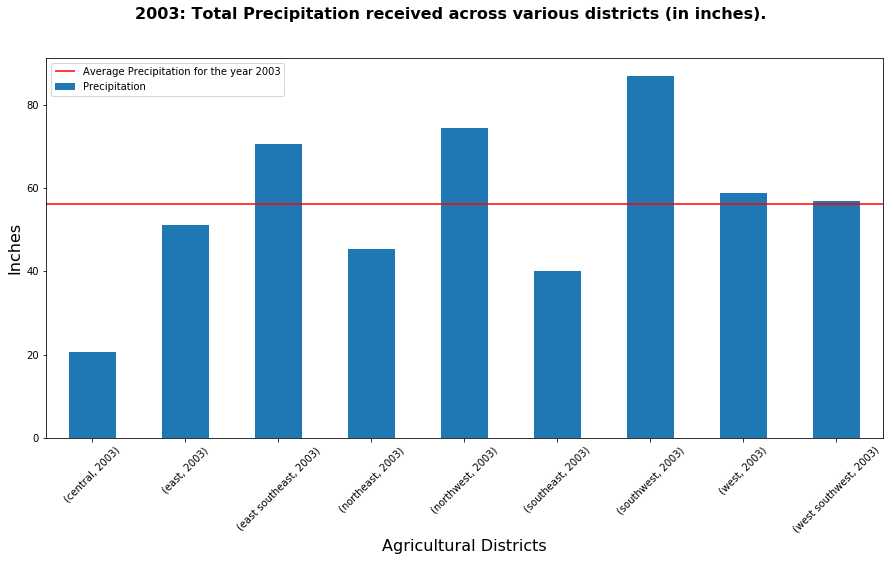

AG_DISTRICT     YEAR
central         2004    26.71
east            2004    51.94
east southeast  2004    60.03
northeast       2004    54.46
northwest       2004    92.82
Name: PRECIP, dtype: float64




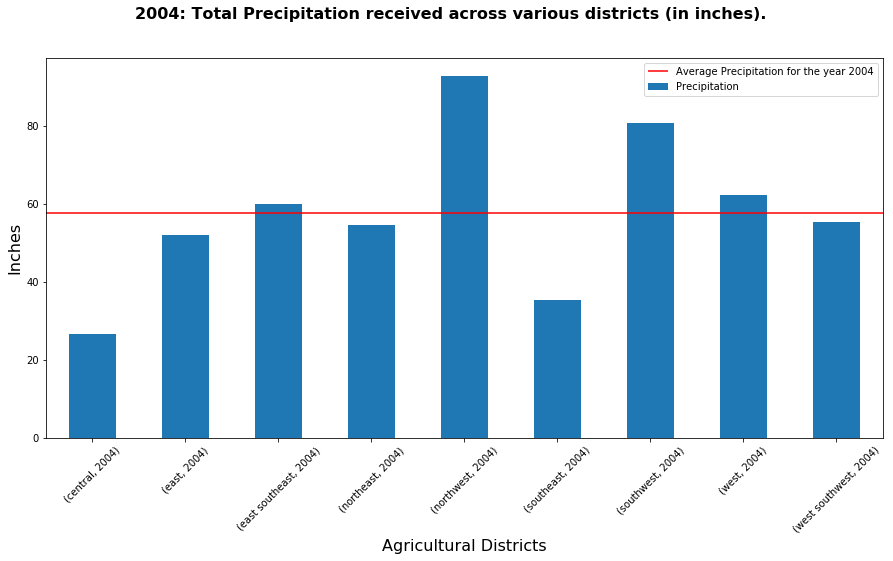

AG_DISTRICT     YEAR
central         2005    27.33
east            2005    44.40
east southeast  2005    59.25
northeast       2005    36.76
northwest       2005    64.73
Name: PRECIP, dtype: float64




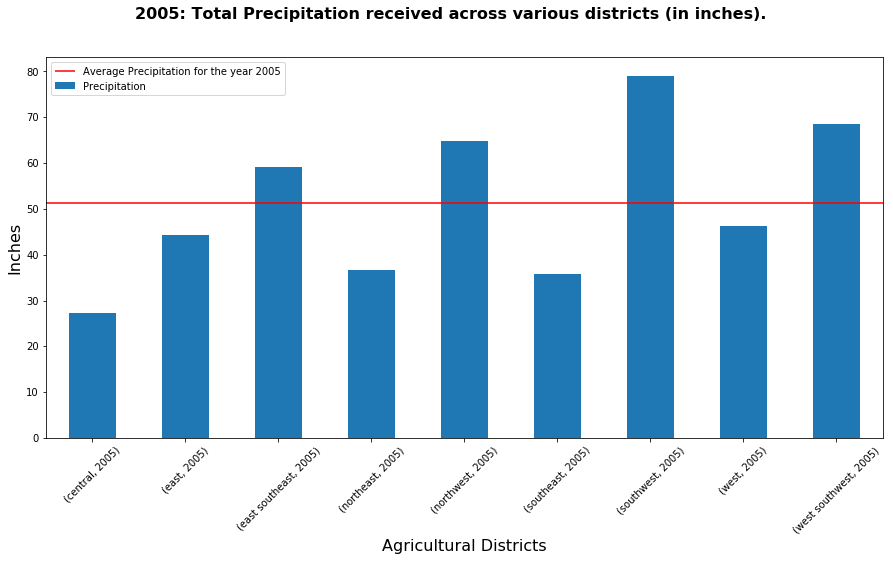

AG_DISTRICT     YEAR
central         2006     40.47
east            2006     51.35
east southeast  2006     82.23
northeast       2006     49.66
northwest       2006    107.46
Name: PRECIP, dtype: float64




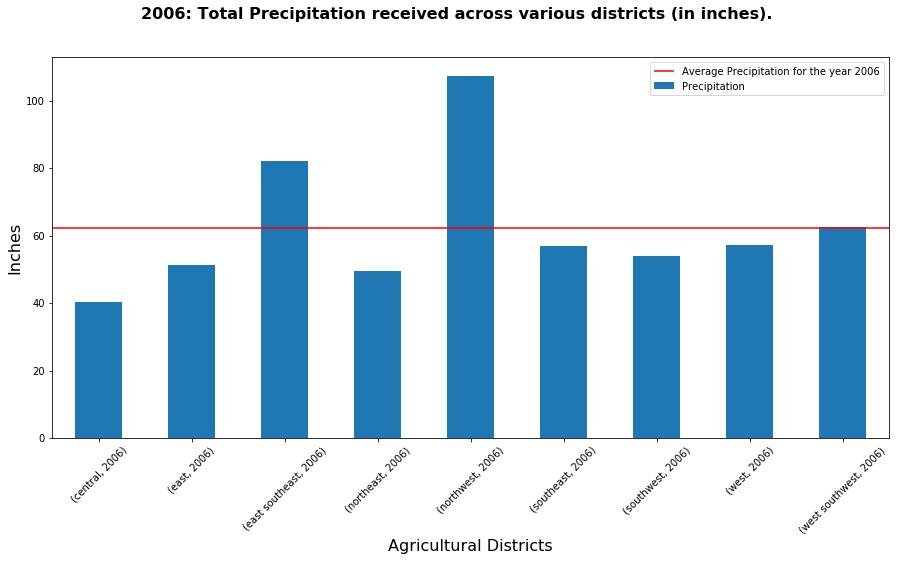

AG_DISTRICT     YEAR
central         2007    46.05
east            2007    54.82
east southeast  2007    58.66
northeast       2007    47.63
northwest       2007    38.14
Name: PRECIP, dtype: float64




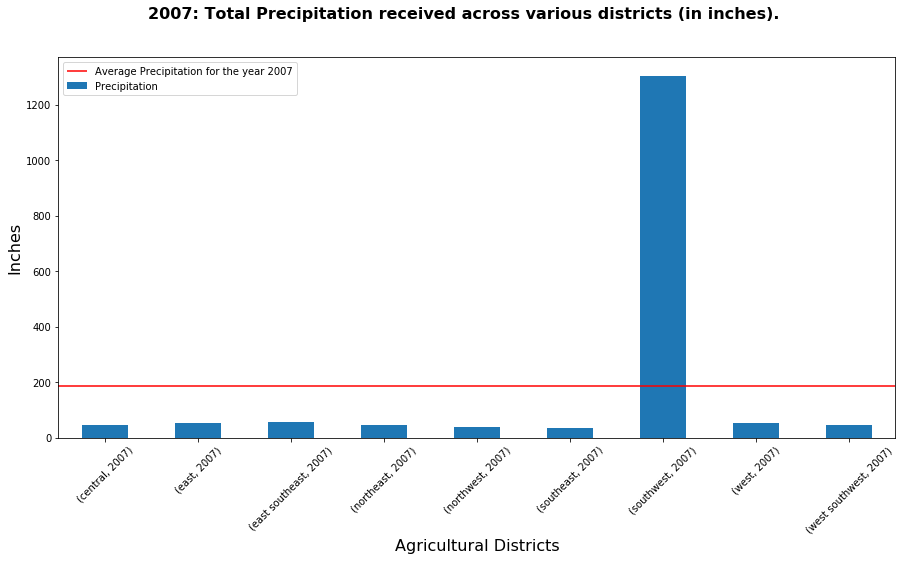

AG_DISTRICT     YEAR
central         2008     59.930
east            2008     81.425
east southeast  2008    115.275
northeast       2008     49.840
northwest       2008     54.800
Name: PRECIP, dtype: float64




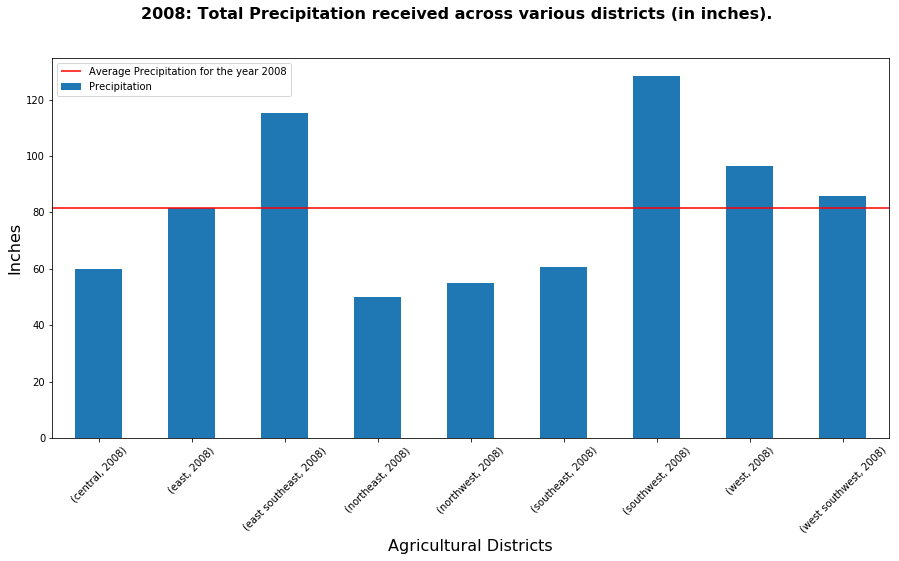

AG_DISTRICT     YEAR
central         2009     66.25
east            2009     79.09
east southeast  2009     92.03
northeast       2009     53.32
northwest       2009    715.81
Name: PRECIP, dtype: float64




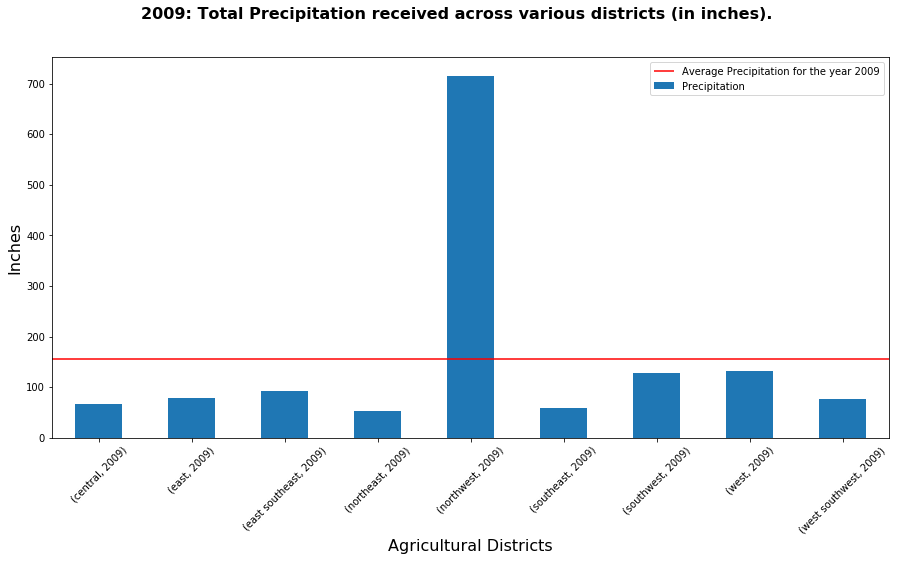

AG_DISTRICT     YEAR
central         2010    45.60
east            2010    53.81
east southeast  2010    74.25
northeast       2010    46.11
northwest       2010    59.66
Name: PRECIP, dtype: float64




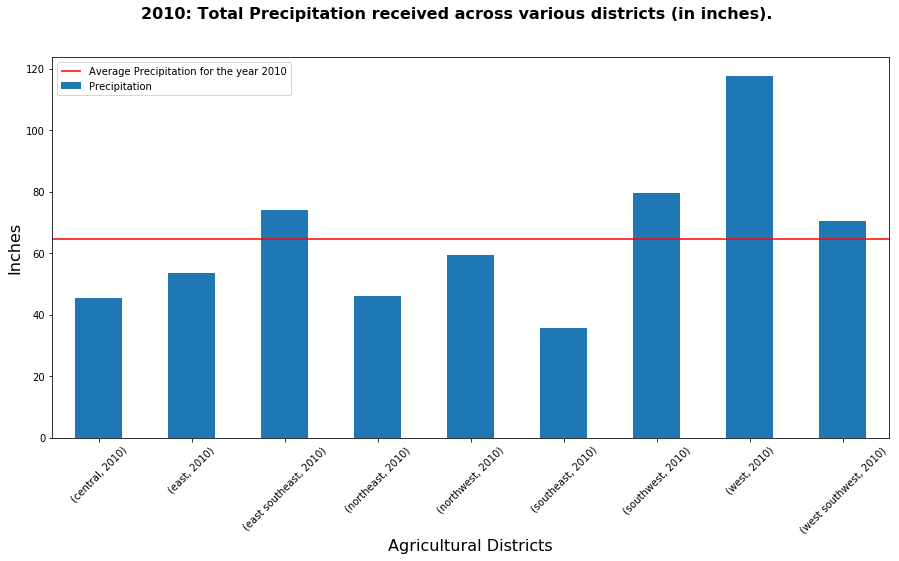

AG_DISTRICT     YEAR
central         2011      52.21
east            2011    1075.77
east southeast  2011    1084.80
northeast       2011      70.73
northwest       2011      76.03
Name: PRECIP, dtype: float64




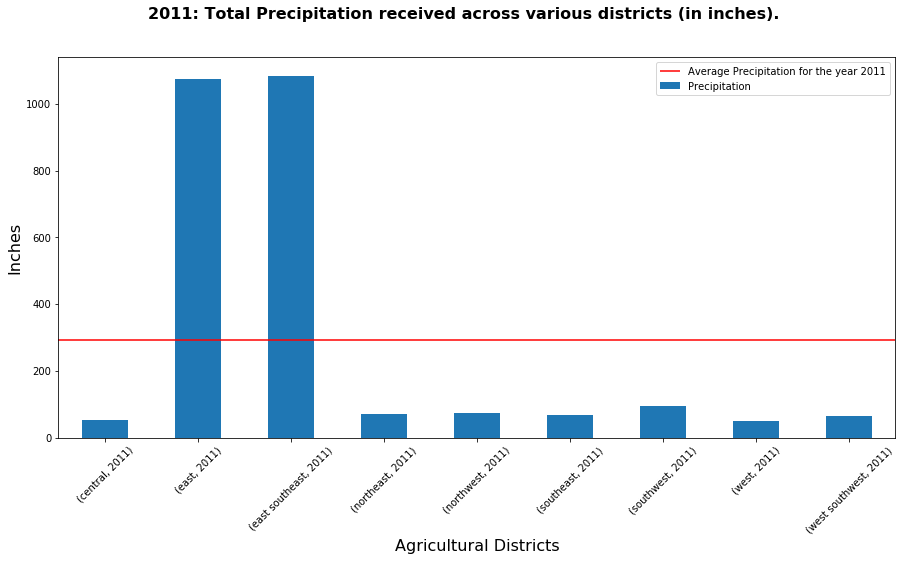

AG_DISTRICT     YEAR
central         2012    43.78
east            2012    70.16
east southeast  2012    68.39
northeast       2012    51.71
northwest       2012    54.96
Name: PRECIP, dtype: float64




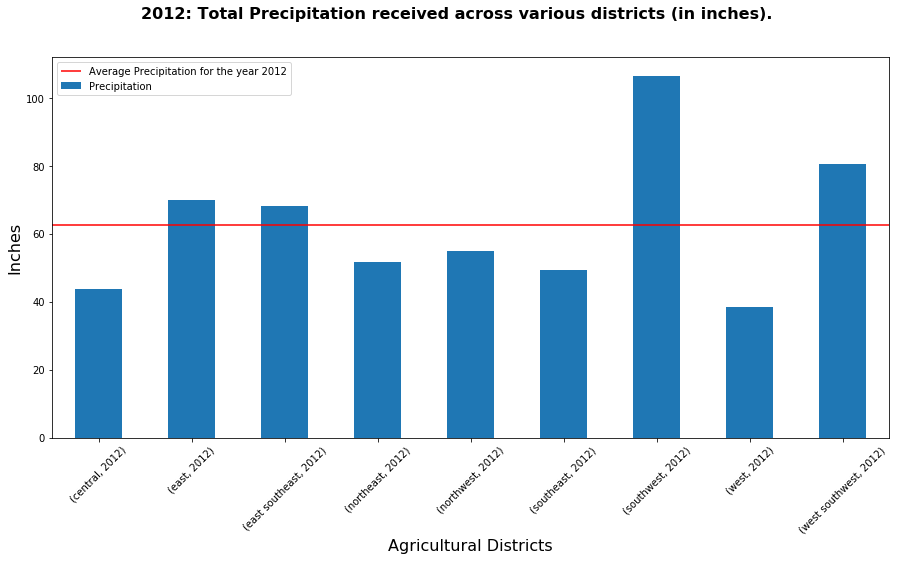

AG_DISTRICT     YEAR
central         2013     49.820
east            2013     91.705
east southeast  2013    101.785
northeast       2013     90.040
northwest       2013     85.150
Name: PRECIP, dtype: float64




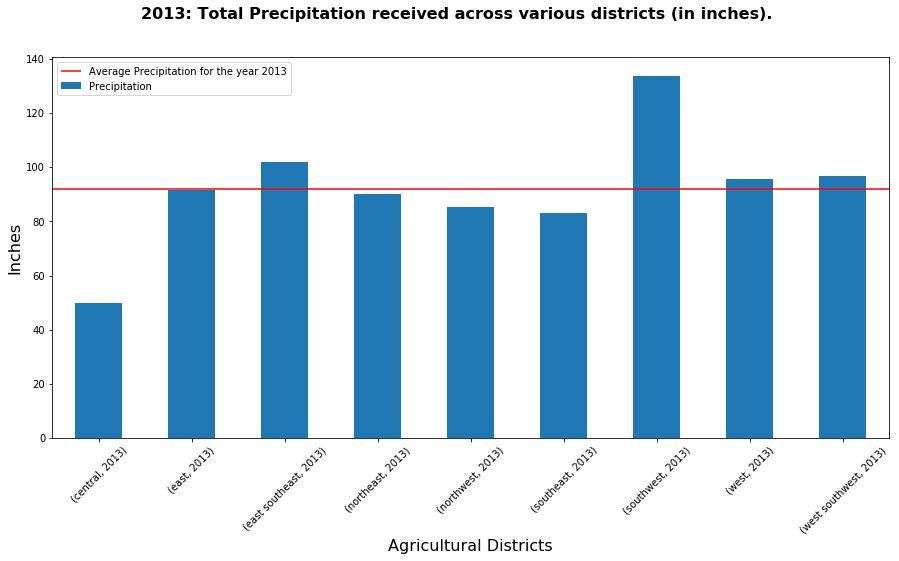

AG_DISTRICT     YEAR
central         2014     64.470
east            2014     99.805
east southeast  2014    100.035
northeast       2014     51.640
northwest       2014     67.920
Name: PRECIP, dtype: float64




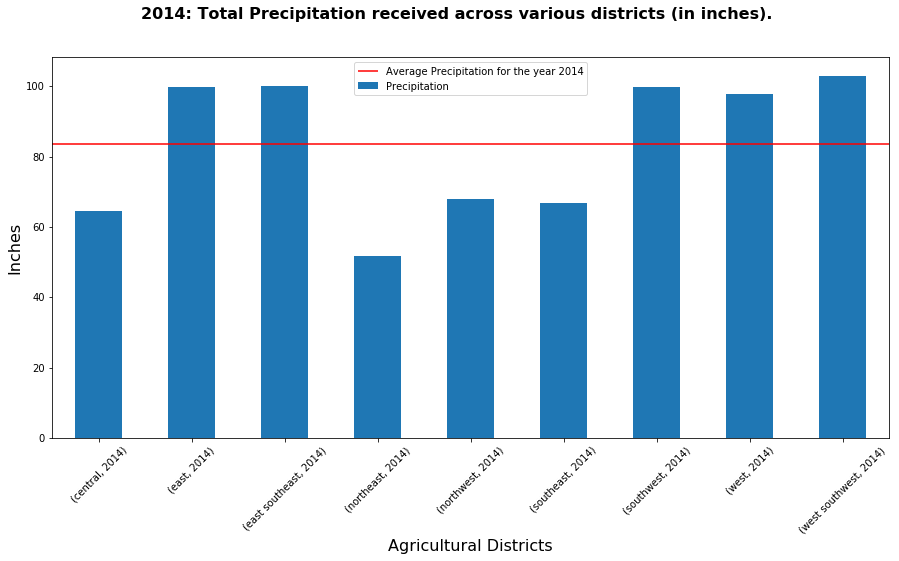

AG_DISTRICT     YEAR
central         2015     82.94
east            2015    114.49
east southeast  2015    107.10
northeast       2015     65.44
northwest       2015    117.19
Name: PRECIP, dtype: float64




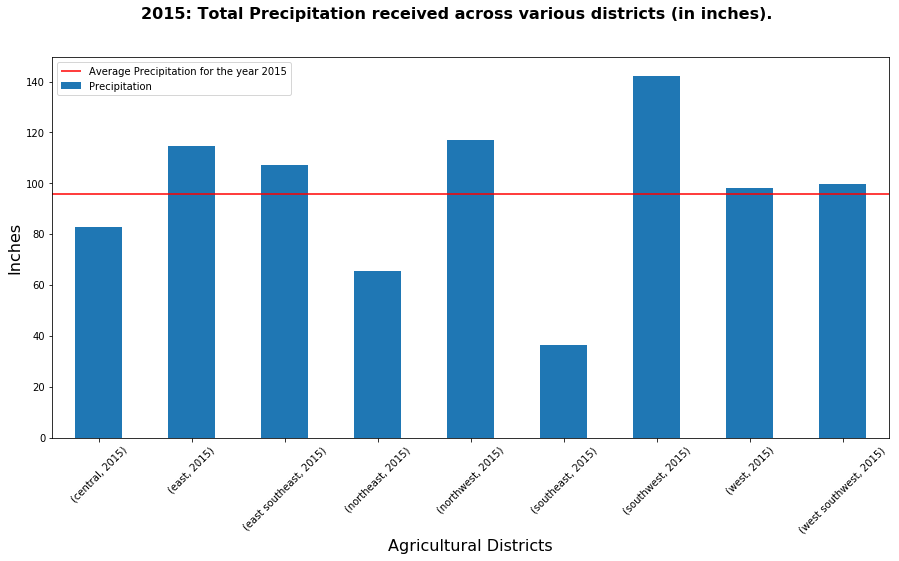

AG_DISTRICT     YEAR
central         2016     71.310
east            2016     84.855
east southeast  2016     92.735
northeast       2016     95.290
northwest       2016    872.540
Name: PRECIP, dtype: float64




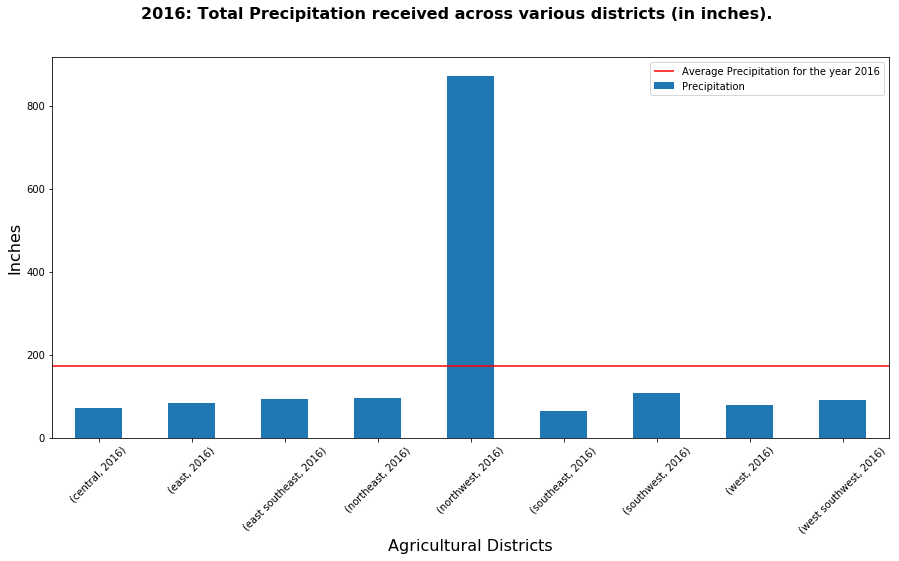

In [285]:
# Precipitation is measured in inches.

start_year = min(sample_weather_data['YEAR'])
end_year = max(sample_weather_data['YEAR'])

# end year + 1 to get it to 2016
for year in range(start_year, end_year+1):
    groupby_yearly = sample_weather_data[sample_weather_data['YEAR'] == year].groupby(['AG_DISTRICT', 'YEAR'])
    groupby_yearly_ppt_data = groupby_yearly['PRECIP'].sum()
    
    print(groupby_yearly_ppt_data.head())
    print("\n")
    #groupby_yearly_ppt_data = groupby_yearly_ppt_data/3
    #print(groupby_yearly_ppt_data.head())
    #print("\n")
    
    # Calculate average precipitation for the given year
    size = groupby_yearly_ppt_data.count()
    average_precipitation = sum(groupby_yearly_ppt_data.iloc[:size].values)/(size)
    
    # Plotting Code
    precp_yearly_title = str(year) + ": Total Precipitation received across various districts (in inches)."
    line_label = "Average Precipitation for the year " + str(year) 
    
    plt.figure(figsize=(15,7))
    plt.suptitle(precp_yearly_title, fontsize=16, fontweight='bold')
    ax1 = groupby_yearly_ppt_data.plot(kind='bar', label ='Precipitation')
    ax2 = plt.hlines(average_precipitation,-2,10, colors='r', linestyles='solid', label=line_label)
    plt.xticks(rotation=45)
    plt.ylabel('Inches', fontsize=16)
    plt.xlabel('Agricultural Districts', fontsize=16)
    plt.legend()
    #plt.savefig("results.jpg")
    plt.show()
    
    # 2008 validation
    # http://www.isws.illinois.edu/atmos/statecli/climate-change/NE-IL-trends/rainfall.htm

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2001        109.0           42.0                30.0
east           2001        153.0           59.0                59.0
east southeast 2001        146.0           50.0                53.0
northeast      2001         82.0           27.0                28.0
northwest      2001         32.0           19.0                42.0




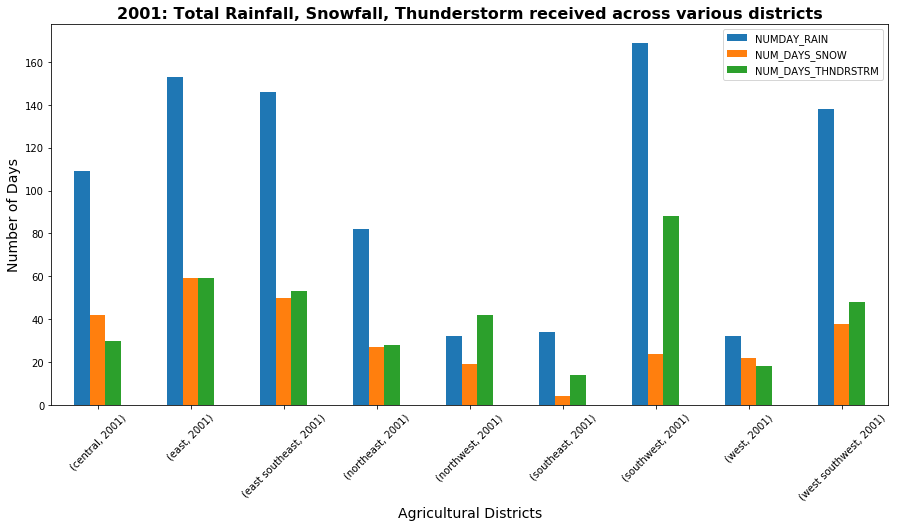

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2002        203.0           55.0                85.0
east           2002        303.0           91.0               161.0
east southeast 2002        311.0           68.0               174.0
northeast      2002        291.0          103.0                65.0
northwest      2002        197.0           68.0                87.0




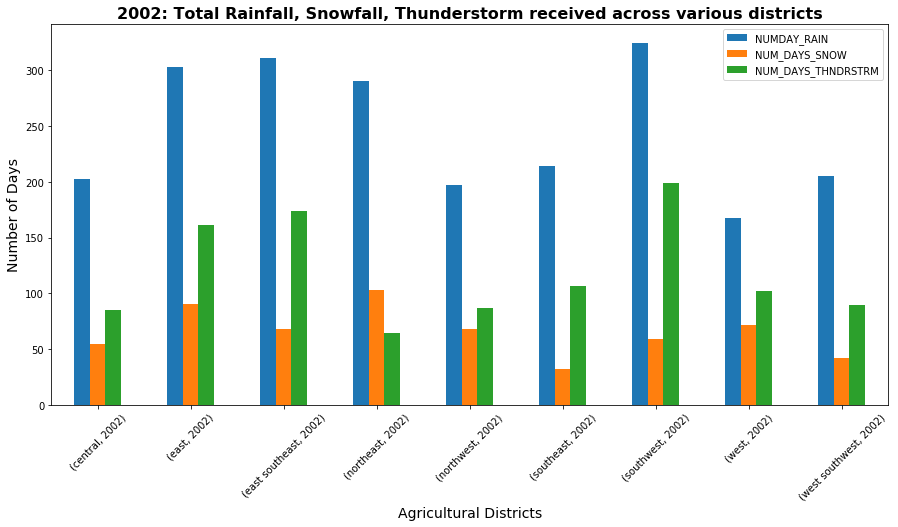

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2003        206.0           80.0                80.0
east           2003        323.0          130.0               148.0
east southeast 2003        335.0          123.0               136.0
northeast      2003        272.0          108.0               135.0
northwest      2003        190.0           71.0               128.0




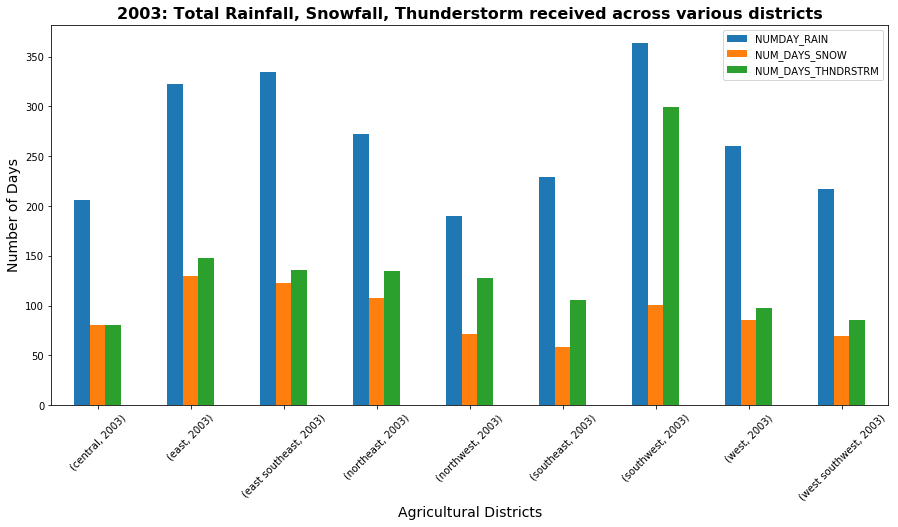

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2004        230.0           63.0                83.0
east           2004        339.0           94.0               159.0
east southeast 2004        344.0           76.0               150.0
northeast      2004        307.0          113.0               152.0
northwest      2004        208.0           75.0               141.0




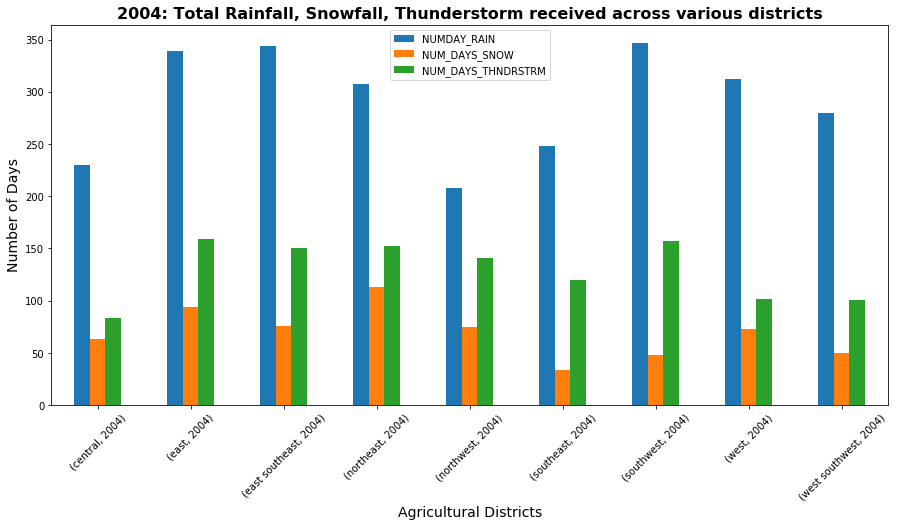

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2005        194.0           73.0                74.0
east           2005        304.0          126.0               161.0
east southeast 2005        321.0           91.0               118.0
northeast      2005        277.0          132.0               164.0
northwest      2005        181.0           87.0               124.0




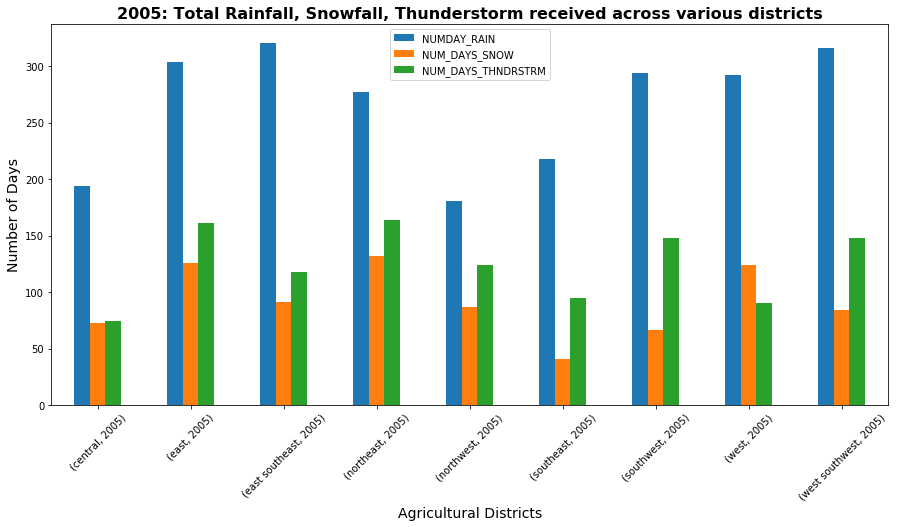

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2006        248.0           38.0               111.0
east           2006        384.0           63.0               197.0
east southeast 2006        352.0           53.0                94.0
northeast      2006        374.0           62.0               207.0
northwest      2006        238.0           36.0               162.0




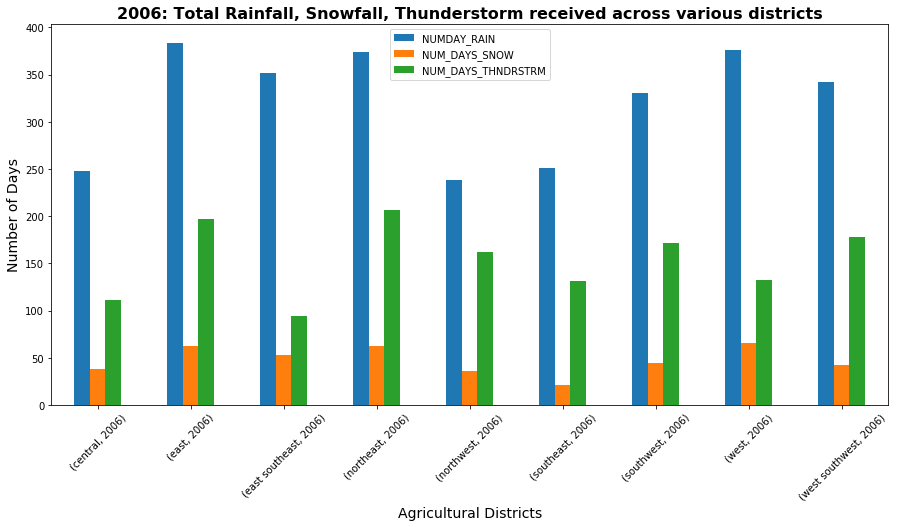

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2007        204.0           71.0                91.0
east           2007        322.0          128.0               148.0
east southeast 2007        358.0           81.0               250.0
northeast      2007        324.0          136.0               153.0
northwest      2007        213.0           83.0               136.0




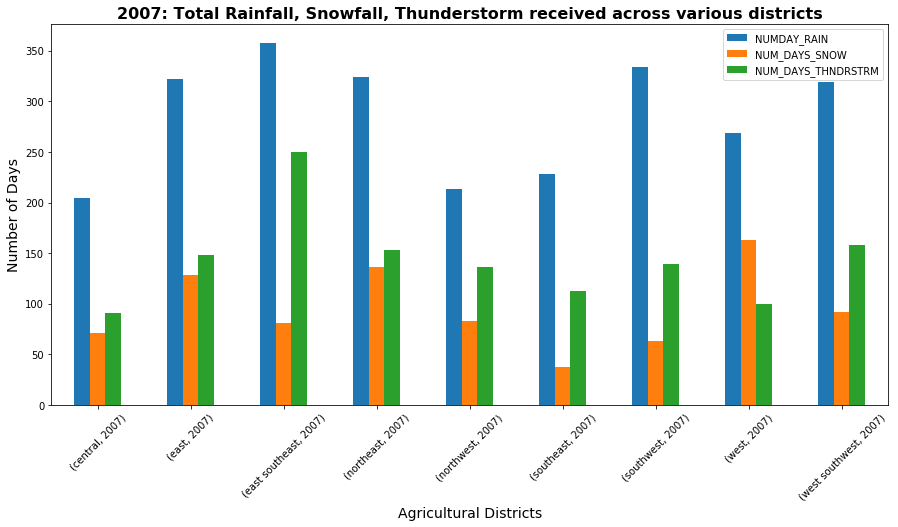

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2008        234.0           99.0               102.0
east           2008        369.0          154.0               171.0
east southeast 2008        385.0          131.0               251.0
northeast      2008        331.0          185.0               175.0
northwest      2008        221.0          121.0               155.0




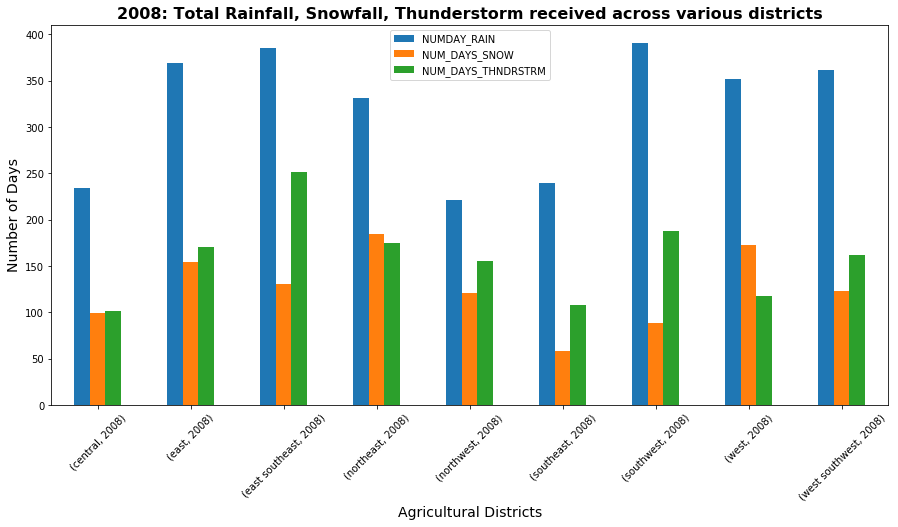

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2009        232.0           78.0               100.0
east           2009        351.0          124.0               153.0
east southeast 2009        363.0           95.0               234.0
northeast      2009        299.0          124.0               100.0
northwest      2009        199.0           79.0                91.0




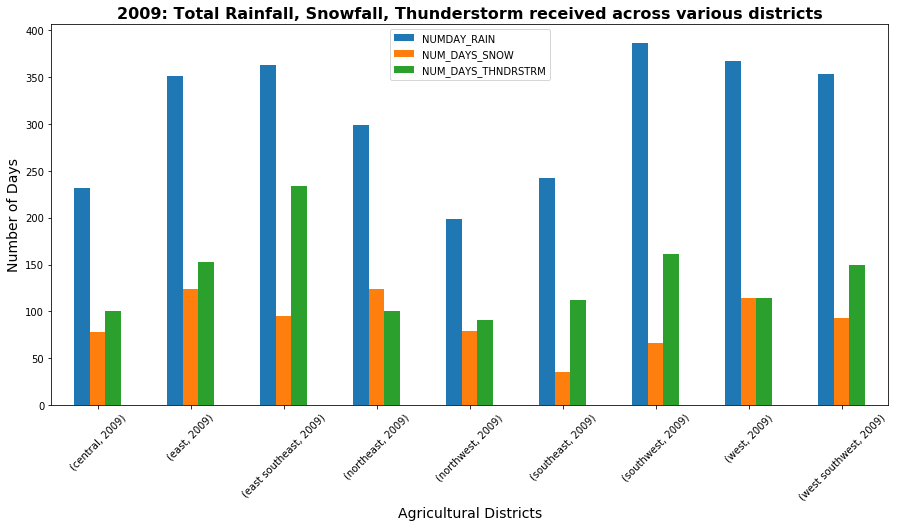

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2010        196.0           70.0               117.0
east           2010        331.0          129.0               178.0
east southeast 2010        325.0          110.0               248.0
northeast      2010        326.0          115.0               161.0
northwest      2010        230.0           79.0               153.0




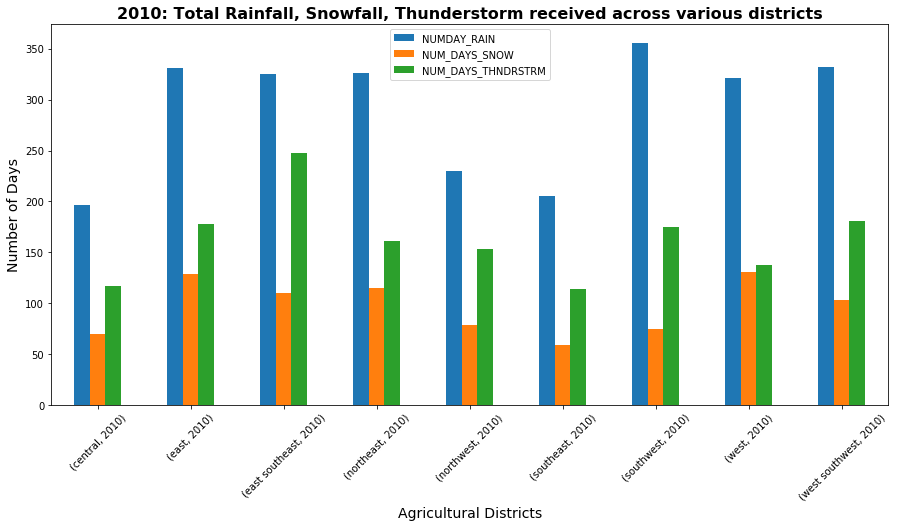

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2011        229.0           46.0                99.0
east           2011        359.0           84.0               148.0
east southeast 2011        366.0           73.0               156.0
northeast      2011        336.0           91.0               145.0
northwest      2011        231.0           55.0               139.0




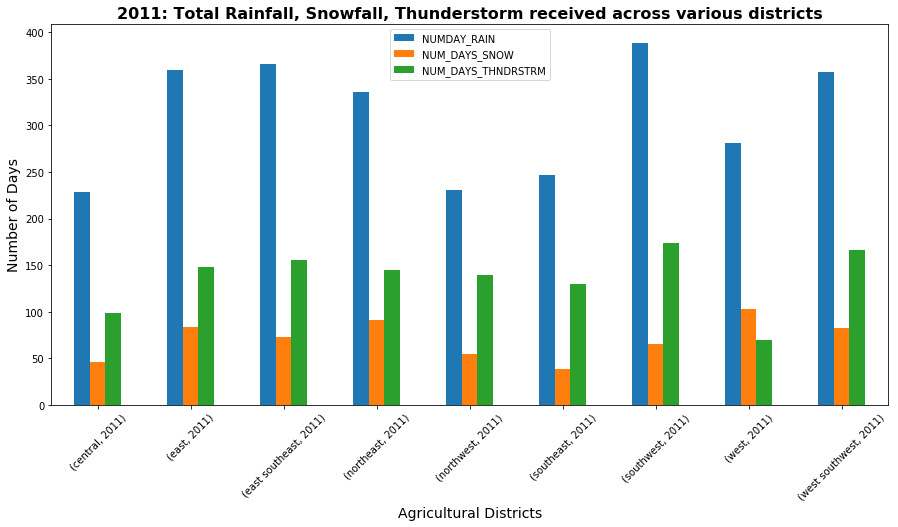

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2012        232.0           43.0                96.0
east           2012        309.0           74.0               153.0
east southeast 2012        340.0           73.0               144.0
northeast      2012        324.0           86.0               156.0
northwest      2012        217.0           58.0               146.0




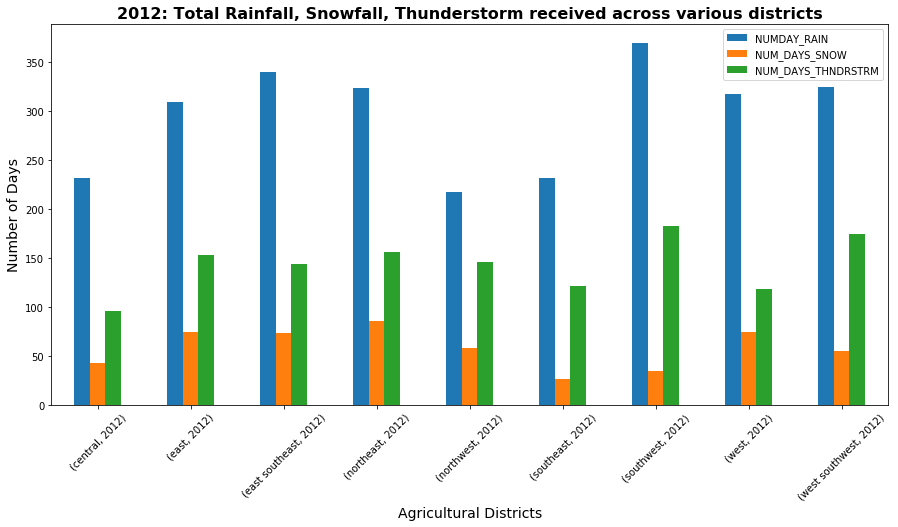

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2013        252.0           87.0                96.0
east           2013        365.0          143.0               136.0
east southeast 2013        385.0          137.0               152.0
northeast      2013        372.0          163.0               170.0
northwest      2013        257.0          103.0               137.0




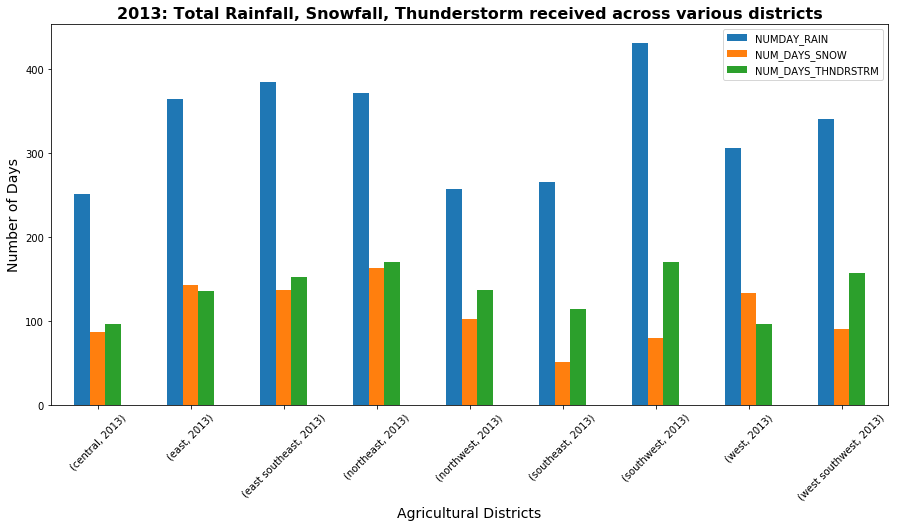

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2014        265.0          109.0               116.0
east           2014        402.0          167.0               183.0
east southeast 2014        421.0          140.0               200.0
northeast      2014        369.0          162.0               171.0
northwest      2014        231.0           99.0               144.0




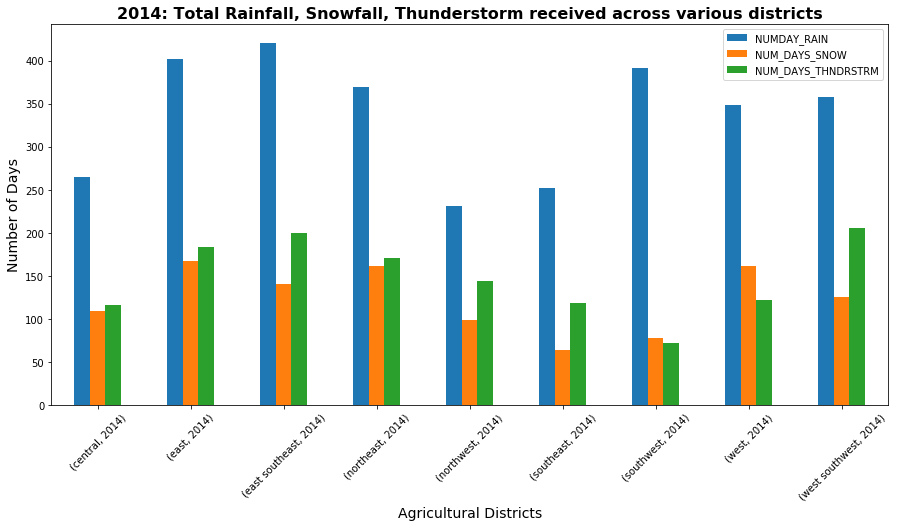

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2015        270.0           59.0               105.0
east           2015        405.0          100.0               176.0
east southeast 2015        389.0           88.0               181.0
northeast      2015        357.0          118.0               177.0
northwest      2015        234.0           69.0               154.0




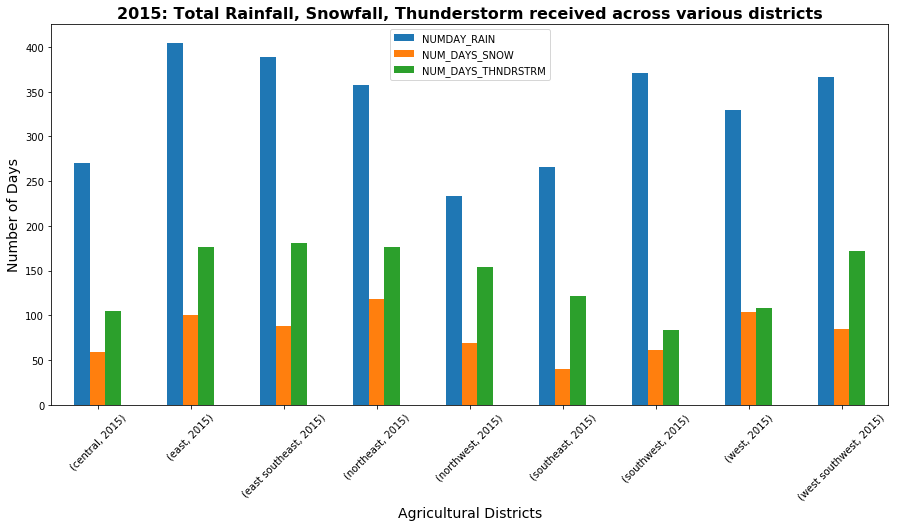

                     NUMDAY_RAIN  NUM_DAYS_SNOW  NUM_DAYS_THNDRSTRM
AG_DISTRICT    YEAR                                                
central        2016        239.0           49.0               115.0
east           2016        379.0           91.0               166.0
east southeast 2016        362.0           66.0               201.0
northeast      2016        389.0          114.0               196.0
northwest      2016        341.0           85.0               185.0




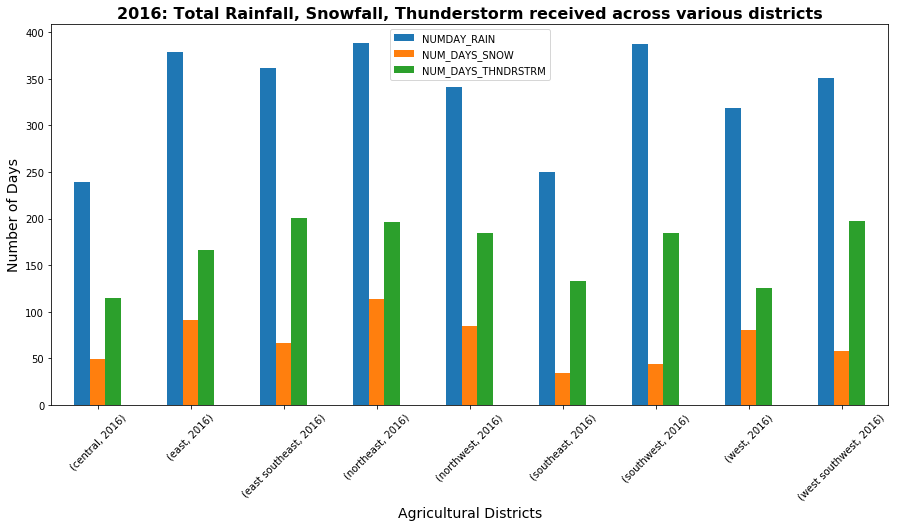

In [286]:
start_year = min(sample_weather_data['YEAR'])
end_year = max(sample_weather_data['YEAR'])

# end year + 1 to get it to 2016
for year in range(start_year, end_year+1):
    groupby_yearly = sample_weather_data[sample_weather_data['YEAR'] == year].groupby(['AG_DISTRICT', 'YEAR'])
    groupby_yearly_ppt_data = groupby_yearly['NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_THNDRSTRM'].sum()
    
    print(groupby_yearly_ppt_data.head())
    print("\n")

    # Plotting Code
    rainfall_yearly_title = str(year) + ": Total Rainfall, Snowfall, Thunderstorm received across various districts"

    ax = groupby_yearly_ppt_data.plot(kind='bar', figsize=(15, 7))
    ax.set_title(rainfall_yearly_title, fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Days', fontsize=14)
    plt.xlabel('Agricultural Districts', fontsize=14)
    plt.legend()
    plt.show()
    #plt.savefig("results.jpg")

In [287]:
start_year = min(sample_weather_data['YEAR'])
end_year = max(sample_weather_data['YEAR'])
end_year = end_year +1

#cols = ['YEAR','TMP_HIGH', 'TMP_AVG',
#       'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG',
#       'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH',
#       'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN',
#       'NUM_DAYS_SNOW', 'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM']

#model = pd.DataFrame(columns = cols)
model = pd.DataFrame()

# end year + 1 to get it to 2016
for year in range(start_year, end_year+1):
    groupby_yearly = sample_weather_data[sample_weather_data['YEAR'] == year].groupby(['AG_DISTRICT', 'YEAR'])
    groupby_yearly_ppt_data = groupby_yearly['TMP_HIGH', 'TMP_AVG',
       'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG',
       'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH',
       'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG', 'PRECIP'].mean()
    groupby_yearly_ppt_data['NUMDAY_RAIN'] = groupby_yearly['NUMDAY_RAIN'].sum()
    groupby_yearly_ppt_data['NUM_DAYS_SNOW'] = groupby_yearly['NUM_DAYS_SNOW'].sum()
    groupby_yearly_ppt_data['NUM_DAYS_FOG'] = groupby_yearly['NUM_DAYS_FOG'].sum()
    groupby_yearly_ppt_data['NUM_DAYS_THNDRSTRM'] = groupby_yearly['NUM_DAYS_THNDRSTRM'].sum()
    model = model.append(groupby_yearly_ppt_data)
    
    #print(groupby_yearly_ppt_data)
    #print("\n")
    
    

print(model)
model.to_csv('model.csv')

                      TMP_HIGH    TMP_AVG    TMP_LOW    DP_HIGH     DP_AVG  \
AG_DISTRICT    YEAR                                                          
central        2001  76.812500  52.274018  26.062500  63.562500  41.897504   
east           2001  79.916667  54.452386  28.458333  65.625000  45.610501   
east southeast 2001  80.541667  56.055738  29.708333  67.250000  47.639305   
northeast      2001  80.882353  56.484235  32.647059  67.352941  47.951923   
northwest      2001  76.800000  51.461332  25.000000  63.500000  41.843583   
southeast      2001  83.750000  62.068910  37.750000  71.166667  53.021886   
southwest      2001  82.583333  59.737963  34.375000  70.291667  50.094697   
west           2001  80.583333  55.685756  12.583333  66.250000  45.789279   
west southwest 2001  78.470588  52.672718  27.764706  63.882353  44.070336   
central        2002  78.541667  52.520190  27.416667  66.416667  43.170533   
east           2002  79.527778  51.644968  25.055556  66.111111 

In [288]:
df = pd.read_csv('model.csv')
#print(df)

cols = [ 'YEAR', 'TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH',
       'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH',
       'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW',
       'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW',
       'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM']

x = []


for year in range(start_year, end_year):
    df_temp = df[df['YEAR'] == year]
    #print (df_temp)
    temp = list(df_temp[['YEAR','TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH',
       'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH',
       'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW',
       'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW',
       'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM']].mean())
    x.append(temp)

#print (final)
final = pd.DataFrame(x, columns = cols)
final.insert(0, 'STATE', 'IL')
final.YEAR = final.YEAR.astype(int)
final.NUMDAY_RAIN = final.NUMDAY_RAIN.astype(int)
final.NUM_DAYS_SNOW = final.NUM_DAYS_SNOW.astype(int)
final.NUM_DAYS_FOG = final.NUM_DAYS_FOG.astype(int)
final.NUM_DAYS_THNDRSTRM = final.NUM_DAYS_THNDRSTRM.astype(int)
print (final)

final.to_csv('final_yearly.csv')
   

   STATE  YEAR   TMP_HIGH    TMP_AVG    TMP_LOW    DP_HIGH     DP_AVG  \
0     IL  2001  80.037827  55.654784  28.261029  66.542347  46.435446   
1     IL  2002  79.787831  53.077172  26.675044  65.652513  43.322117   
2     IL  2003  78.078704  51.462291  25.841049  63.283951  42.026779   
3     IL  2004  78.079289  52.479509  26.009046  66.316145  43.369229   
4     IL  2005  79.962963  53.354209  27.706790  65.466049  43.818200   
5     IL  2006  80.590777  53.958723  29.148057  66.088780  44.380714   
6     IL  2007  79.141975  53.698888  27.385802  64.283951  42.663091   
7     IL  2008  78.149691  51.043856  26.341049  65.993827  41.607786   
8     IL  2009  76.430069  51.165283  25.991525  62.812504  41.936807   
9     IL  2010  78.146605  53.014211  27.697531  63.648148  42.845686   
10    IL  2011  79.709786  53.698267  29.495189  64.518519  44.019874   
11    IL  2012  83.304012  55.937607  29.814815  66.538580  44.387479   
12    IL  2013  79.205776  51.141635  25.197222  66

In [290]:
final_yearly = pd.read_csv('final_yearly.csv')
final_yearly

price_yearly = pd.read_csv('IL_Corn_Yearly.csv')
ps = price_yearly[['Year', 'Value']]
ps = ps.sort_values('Year')
ps = ps.reset_index(drop=True)

#print (ps)
#print (ps['Value'])

final_yearly['Price'] = ps['Value']
#print (final_yearly)
final_yearly.to_csv('input_model.csv')



In [292]:
input_model = pd.read_csv('input_model.csv')
input_model.drop('Unnamed: 0', axis=1, inplace=True)
input_model.drop('Unnamed: 0.1', axis=1, inplace=True)
input_model

,STATE,YEAR,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,HUM_AVG,...,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,Price
0,IL,2001,80.037827,55.654784,28.261029,66.542347,46.435446,19.945915,98.305147,73.144231,...,8.418984,0.193056,28.881645,7.342293,1.454569,99,31,29,42,2.04
1,IL,2002,79.787831,53.077172,26.675044,65.652513,43.322117,17.720062,97.488977,72.169586,...,8.453888,0.167196,29.856129,7.795684,1.774624,246,65,47,118,2.35
2,IL,2003,78.078704,51.462291,25.841049,63.283951,42.026779,16.702160,98.450617,72.401352,...,8.332801,0.097222,29.330247,7.844780,1.740031,266,91,69,135,2.42
3,IL,2004,78.079289,52.479509,26.009046,66.316145,43.369229,18.819125,98.356162,73.573177,...,8.502143,0.179438,29.156503,7.739727,1.741396,290,69,69,129,2.14
4,IL,2005,79.962963,53.354209,27.706790,65.466049,43.818200,19.175926,98.817901,72.697248,...,8.302306,0.245370,27.864198,7.227956,1.524059,266,91,70,124,2.08
5,IL,2006,80.590777,53.958723,29.148057,66.088780,44.380714,21.568264,97.709695,72.375546,...,8.540090,0.171024,29.945715,7.685777,1.898741,321,47,65,153,3.07
6,IL,2007,79.141975,53.698888,27.385802,64.283951,42.663091,16.694444,96.530864,69.297483,...,8.612506,0.268519,29.648148,7.751157,5.339568,285,95,57,143,4.09
7,IL,2008,78.149691,51.043856,26.341049,65.993827,41.607786,17.635802,96.865741,71.912252,...,8.728229,0.087963,31.555556,8.093230,2.447701,320,125,66,158,4.01
8,IL,2009,76.430069,51.165283,25.991525,62.812504,41.936807,17.804854,96.474673,72.402954,...,8.641811,0.129134,29.579851,7.682615,4.669101,310,89,71,134,3.53
9,IL,2010,78.146605,53.014211,27.697531,63.648148,42.845686,17.560185,97.453704,71.390383,...,8.733219,0.145062,29.526235,7.263565,1.925000,291,96,76,162,5.24
